In [118]:
# Liblary for machine learning and built grap
from scipy import stats
from matplotlib import pyplot as plt
import sklearn as sk
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Liblary for work with request
import requests
import seaborn as sns 
import pandas as pd 
import numpy as np
from io import StringIO
from collections import defaultdict
import re
import unittest

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [2]:
# STEP 1. EDA

In [117]:
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv"

response = requests.get(url)

def check_status_code(response) -> bool:
    match response.status_code:
        case 200:
            print('All okay')
            return True
        case 404:
            raise Exception('Page not found')
        case _ as e:
            print(f'Something wrong: {e}')
            return False

In [3]:
check_status_code(response)

All okay


True

In [4]:
# Tests for checking the check_status_code function performance

class TestCheckStatusCode(unittest.TestCase):

    def test_successful_request(self):
        url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv"
        response = requests.get(url)
        result = check_status_code(response)
        self.assertTrue(result)

    def test_not_found_request(self):
        url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv"
        response = requests.get(url)
        with self.assertRaises(Exception) as context:
            check_status_code(response)
        self.assertEqual(str(context.exception), 'Page not found')

check_status_code(response)

All okay


True

In [5]:
data = pd.read_csv(url)

In [6]:
data.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [7]:
data.describe()

,Unnamed: 0,item_id,price,depth,height,width
count,3694.000000,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000
mean,1846.500000,4.863240e+07,1078.208419,54.379202,101.679970,104.470853
std,1066.510275,2.888709e+07,1374.652494,29.958351,61.097585,71.133771
min,0.000000,5.848700e+04,3.000000,1.000000,1.000000,1.000000
25%,923.250000,2.039057e+07,180.900000,38.000000,67.000000,60.000000
50%,1846.500000,4.928808e+07,544.700000,47.000000,83.000000,80.000000
75%,2769.750000,7.040357e+07,1429.500000,60.000000,124.000000,140.000000
max,3693.000000,9.993262e+07,9585.000000,257.000000,700.000000,420.000000


Descriptive statistics analysis for numerical columns in the dataset:

The 'item_id' column contains 3694 unique elements with no missing values. The average 'item_id' is approximately 4.86e+07, with a standard deviation of around 2.89e+07. This indicates a significant spread of values in the 'item_id' data.

The 'price' column also has no missing values and has an average value of approximately 1078.21. The standard deviation is 1374.65, suggesting a wide range of prices for the items.

The 'depth', 'height', and 'width' columns have different numbers of missing values (2231, 2706, and 3105, respectively). In these columns, both the average values and standard deviations vary, indicating differences in sizes and dimensions of the items.

The 'Unnamed: 0' column represents simple row indexing and does not carry meaningful information. The average value and standard deviation are meaningless for this column, but they confirm that it is just an ordinal number.

In [8]:
data['item_id'].unique()

array([90420332,   368814,  9333523, ...,  9158152, 59157541, 89157573])

In [9]:
data['name'].unique()

array(['FREKVENS', 'NORDVIKEN', 'NORDVIKEN / NORDVIKEN', 'STIG',
       'NORBERG', 'INGOLF', 'FRANKLIN', 'DALFRED', 'EKEDALEN / EKEDALEN',
       'NORRARYD', 'EKEDALEN', 'TOMMARYD', 'HENRIKSDAL', 'KULLABERG',
       'JANINGE', 'RÅSKOG', 'STENSELE / NORRARYD', 'STENSELE', 'NORRÅKER',
       'NORRÅKER / NORRÅKER', 'YNGVAR', 'NORRÅKER / NORRARYD', 'BERNHARD',
       'GLENN', 'MINNEN', 'BRIMNES', 'SMÅGÖRA', 'PLATSA', 'VATTVIKEN',
       'SLÄKT', 'NEIDEN', 'LEIRVIK', 'HEMNES', 'SLATTUM', 'SAGSTUA',
       'ASKVOLL', 'TRYSIL', 'MALM', 'RAMSTA', 'SONGESAND', 'SNIGLAR',
       'LAUVIK', 'NESTTUN', 'TYSSEDAL', 'RIDABU', 'KRITTER', 'SANDVIKA',
       'HAMMARN', 'BJÖRKSNÄS', 'NORDLI', 'FYRESDAL', 'MYDAL', 'TUFFING',
       'SÄBÖVIK', 'LYCKSELE', 'TARVA', 'BUSUNGE', 'MARKERAD', 'GJÖRA',
       'UTÅKER', 'BRYNE', 'KURA', 'FRIHETEN', 'VITVAL', 'LURÖY',
       'DELAKTIG', 'STUVA', 'VIMLE', 'KONGSFJORD', 'NYHAMN', 'ASKEBY',
       'SUNDVIK', 'SOLGUL', 'VIKARE', 'VALLENTUNA', 'SVÄRTA',
       'LYCKSELE

In [10]:
data.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

The majority of missing values are found in the 'depth', 'height', and 'width' columns.
Understanding the context of these columns is crucial to decide how to handle missing values. Options include imputation, removal of rows, or considering them separately in the analysis.
Other columns have no missing values, indicating good data completeness.

In [11]:
data.shape

(3694, 14)

In [12]:
data.sample(5)

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
3465,3465,40407922,BRIMNES,Wardrobes,645.0,No old price,True,https://www.ikea.com/sa/en/p/brimnes-wardrobe-...,No,"Wardrobe with 3 doors, 117x19...",K Hagberg/M Hagberg,50.0,190.0,117.0
3371,3371,50357002,KALLRÖR,TV & media furniture,25.0,No old price,True,https://www.ikea.com/sa/en/p/kallroer-handle-s...,No,"Handle, 213 mm",IKEA of Sweden,38.0,NaN,NaN
1221,1221,80265143,BERTIL,Chairs,11.4,SR 19,True,https://www.ikea.com/sa/en/p/bertil-chair-pad-...,No,"Chair pad, 33 cm",IKEA of Sweden,NaN,NaN,NaN
3468,3468,80331973,VUKU,Wardrobes,49.0,No old price,True,https://www.ikea.com/sa/en/p/vuku-wardrobe-whi...,No,"Wardrobe, 74x51x149 cm",J Karlsson/W Chong,51.0,149.0,74.0
2684,2684,49001965,LINNMON / ADILS,Tables & desks,300.0,SR 325,True,https://www.ikea.com/sa/en/p/linnmon-adils-tab...,Yes,"Table, 200x60 cm",IKEA of Sweden,NaN,74.0,60.0


In [13]:
data.dtypes

Unnamed: 0             int64
item_id                int64
name                  object
category              object
price                float64
old_price             object
sellable_online         bool
link                  object
other_colors          object
short_description     object
designer              object
depth                float64
height               float64
width                float64
dtype: object

In [14]:
data['item_id'].describe()

count    3.694000e+03
mean     4.863240e+07
std      2.888709e+07
min      5.848700e+04
25%      2.039057e+07
50%      4.928808e+07
75%      7.040357e+07
max      9.993262e+07
Name: item_id, dtype: float64

In [15]:
data.info

<bound method DataFrame.info of       Unnamed: 0   item_id                   name       category   price  \
0              0  90420332               FREKVENS  Bar furniture   265.0   
1              1    368814              NORDVIKEN  Bar furniture   995.0   
2              2   9333523  NORDVIKEN / NORDVIKEN  Bar furniture  2095.0   
3              3  80155205                   STIG  Bar furniture    69.0   
4              4  30180504                NORBERG  Bar furniture   225.0   
...          ...       ...                    ...            ...     ...   
3689        3689  99157902                ELVARLI      Wardrobes   750.0   
3690        3690   9158152                ELVARLI      Wardrobes  1572.0   
3691        3691  59157541                ELVARLI      Wardrobes   924.0   
3692        3692  89157573                ELVARLI      Wardrobes  2745.0   
3693        3693  69157376                ELVARLI      Wardrobes  1231.0   

         old_price  sellable_online  \
0     No old pri

In [16]:
# Search for duplicates

data[data.duplicated('item_id')]

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
803,803,30441554,TIMMERVIKEN,Cabinets & cupboards,115.0,No old price,True,https://www.ikea.com/sa/en/p/timmerviken-door-...,No,"Door, 60x64 cm",304.415.54 The door keeps your belongings hidd...,NaN,64.0,60.0
805,805,80441556,TIMMERVIKEN,Cabinets & cupboards,100.0,No old price,True,https://www.ikea.com/sa/en/p/timmerviken-door-...,No,"Door/drawer front, 60x38 cm",804.415.56 The front may be used as a door or ...,NaN,38.0,60.0
807,807,10443629,GLASSVIK,Cabinets & cupboards,175.0,No old price,True,https://www.ikea.com/sa/en/p/glassvik-glass-do...,Yes,"Glass door, 60x38 cm",IKEA of Sweden,NaN,38.0,60.0
808,808,80275887,KALLAX,Cabinets & cupboards,250.0,No old price,True,https://www.ikea.com/sa/en/p/kallax-shelving-u...,Yes,"Shelving unit, 77x147 cm",Tord Björklund,39.0,147.0,77.0
810,810,40033763,IVAR,Cabinets & cupboards,295.0,No old price,True,https://www.ikea.com/sa/en/p/ivar-cabinet-pine...,No,"Cabinet, 80x30x83 cm",IKEA of Sweden,30.0,83.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3548,3548,90421911,BRYGGJA,Wardrobes,597.0,SR 995,True,https://www.ikea.com/sa/en/p/bryggja-storage-u...,No,"Storage unit, 120x173 cm",Ola Wihlborg,43.0,173.0,120.0
3572,3572,9157261,ELVARLI,Wardrobes,440.0,SR 540,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 52x36x222-350 cm",Ehlén Johansson,35.0,NaN,51.0
3628,3628,99188003,ELVARLI,Wardrobes,2377.0,"SR 3,025",True,https://www.ikea.com/sa/en/p/elvarli-4-section...,No,"4 sections, 262x36x222-350 cm",Ehlén Johansson,35.0,NaN,261.0
3676,3676,59315159,ELVARLI,Wardrobes,2397.0,"SR 2,945",True,https://www.ikea.com/sa/en/p/elvarli-3-section...,No,"3 sections, 258x51x222-350 cm",Ehlén Johansson,51.0,NaN,258.0


Therefore, we have 732 rows that are duplicates based on the item number, and they need to be removed in the future. Duplicates can distort the analysis as they may lead to incorrect or redundant results. Identifying and removing duplicates help ensure consistency and standardization of data. Duplicates can result in errors during data aggregation, computation of statistics, and other data processing operations. Eliminating duplicates contributes to preventing such errors.

In [17]:
data['item_id'].value_counts()

item_id
79241940    4
30247378    3
347888      3
60323592    3
20273141    3
           ..
90309721    1
80265143    1
40238712    1
80433900    1
89157573    1
Name: count, Length: 2962, dtype: int64

In [20]:
# Price Histogram

Text(0, 0.5, 'Frequency')

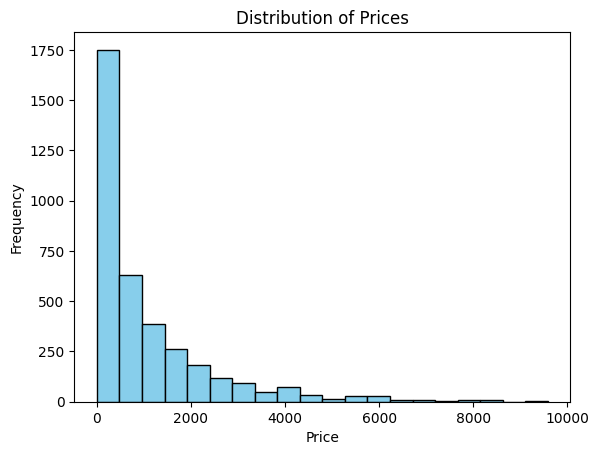

In [19]:
plt.hist(data['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

<Axes: xlabel='price', ylabel='Count'>

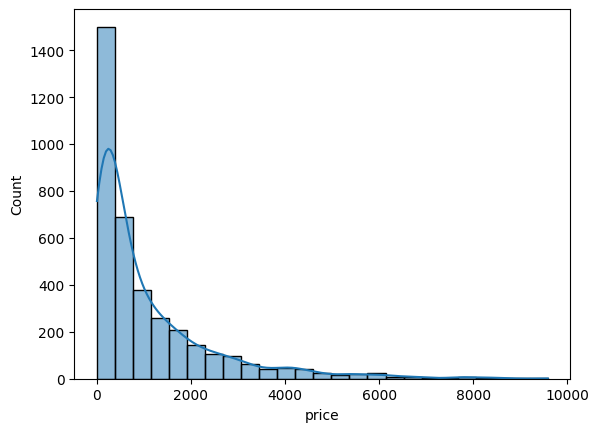

In [20]:
sns.histplot(data['price'], kde=True, bins=25)

Text(0.5, 1.0, 'Scatter Plot of Width vs. Height')

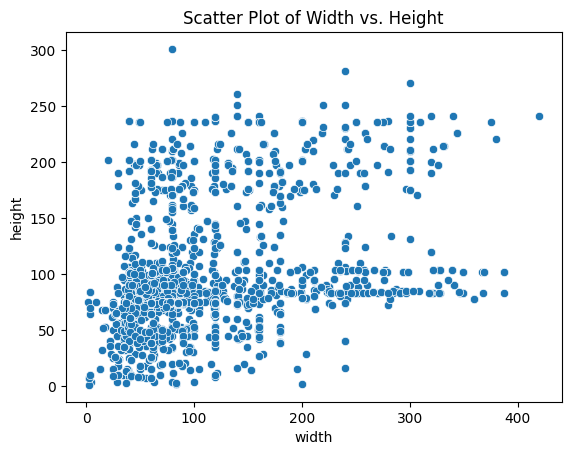

In [21]:
# Scatter Plot for Dimensions

sns.scatterplot(x='width', y='height', data=data)
plt.title('Scatter Plot of Width vs. Height')

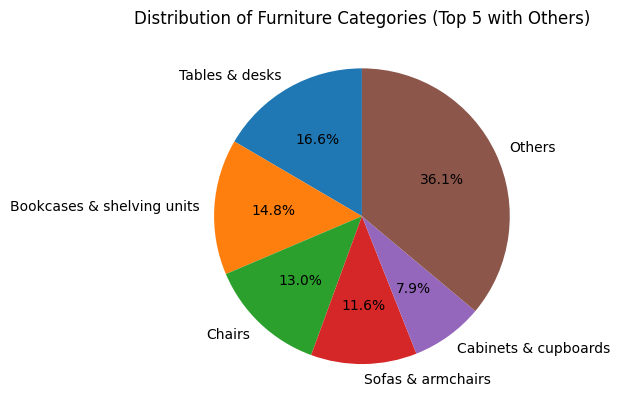

In [22]:
# Pie Chart for Categories

category_counts = data['category'].value_counts()
top_categories = category_counts.head(5)
others_count = category_counts[5:].sum()
top_categories_with_others = pd.concat([top_categories, pd.Series({'Others': others_count})])

plt.pie(top_categories_with_others, labels=top_categories_with_others.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Furniture Categories (Top 5 with Others)')
plt.show()

In [23]:
# Removing duplicates

unique_data = data.drop_duplicates(subset=['item_id'], keep='first').copy()

In [24]:
unique_data[unique_data.duplicated('item_id')]

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width


In [25]:
unique_data['item_id'].value_counts()

item_id
90420332    1
40396278    1
99297484    1
20328327    1
40394830    1
           ..
79285302    1
60428990    1
428974      1
30428982    1
89157573    1
Name: count, Length: 2962, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

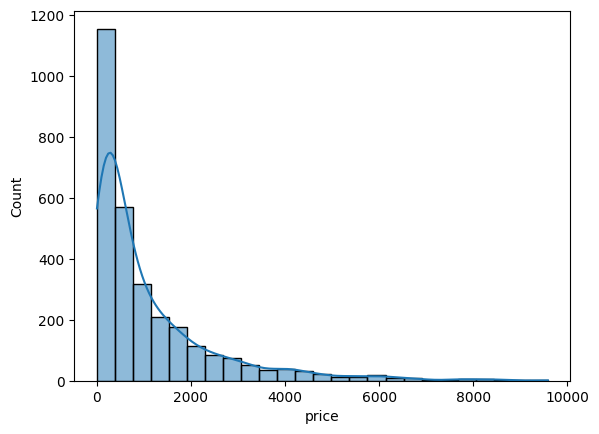

In [26]:
sns.histplot(unique_data['price'], kde=True, bins=25) # Constructing a histogram based on the cleaned data without duplicates showed that the price distribution did not change.

In [27]:
unique_data['other_colors'].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
unique_data.isnull().sum()

Unnamed: 0              0
item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1118
height                726
width                 442
dtype: int64

In [29]:
unique_data.shape

(2962, 14)

In [30]:
# Check unique category

unique_data['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [31]:
unique_data['link'].unique()

array(['https://www.ikea.com/sa/en/p/frekvens-bar-table-in-outdoor-black-90420332/',
       'https://www.ikea.com/sa/en/p/nordviken-bar-table-black-00368814/',
       'https://www.ikea.com/sa/en/p/nordviken-nordviken-bar-table-and-4-bar-stools-black-black-s09333523/',
       ...,
       'https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s09158152/',
       'https://www.ikea.com/sa/en/p/elvarli-2-sections-white-s59157541/',
       'https://www.ikea.com/sa/en/p/elvarli-3-sections-white-s89157573/'],
      dtype=object)

In [33]:
missing_columns = unique_data.columns[unique_data.isnull().any()].to_list()
missing_columns

['depth', 'height', 'width']

In [32]:
columns_for_drop = []

for col in unique_data.columns:
    if unique_data[col].isna().sum() / unique_data.shape[0]  > 0.7:
        columns_for_drop.append(col)

print(columns_for_drop)

[]


In [33]:
unique_data.drop(columns_for_drop,axis = 1)
# we have nothing to delete because the maximum value of missing data is 40% for the 'depth' column

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3688,3688,89330653,PAX / MEHAMN/AULI,Wardrobes,2045.0,No old price,True,https://www.ikea.com/sa/en/p/pax-mehamn-auli-w...,No,"Wardrobe combination, 200x66x...",IKEA of Sweden/Ehlén Johansson,66.0,236.0,200.0
3689,3689,99157902,ELVARLI,Wardrobes,750.0,SR 820,True,https://www.ikea.com/sa/en/p/elvarli-1-section...,No,"1 section, 92x51x222-350 cm",Ehlén Johansson,50.0,NaN,91.0
3690,3690,9158152,ELVARLI,Wardrobes,1572.0,"SR 1,755",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 135x51x222-350 cm",Ehlén Johansson,50.0,NaN,135.0
3691,3691,59157541,ELVARLI,Wardrobes,924.0,"SR 1,050",True,https://www.ikea.com/sa/en/p/elvarli-2-section...,No,"2 sections, 175x51x222-350 cm",Ehlén Johansson,50.0,NaN,175.0


<Axes: xlabel='other_colors', ylabel='price'>

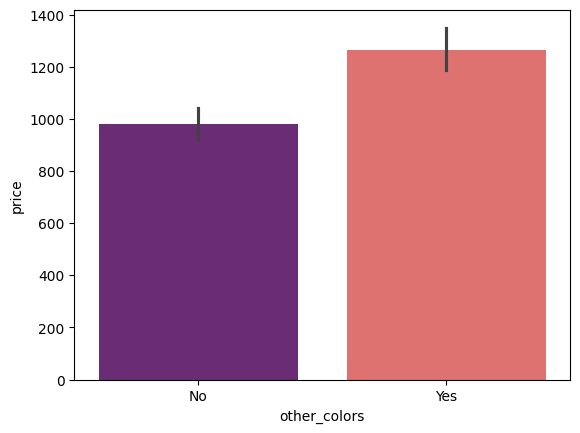

In [34]:
sns.barplot(x = 'other_colors', y = 'price' , data = unique_data, estimator= np.mean, palette = 'magma')

In [35]:
unique_data['category'].unique()

array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
       'Cabinets & cupboards', 'Café furniture', 'Chairs',
       'Chests of drawers & drawer units', "Children's furniture",
       'Nursery furniture', 'Outdoor furniture', 'Room dividers',
       'Sideboards, buffets & console tables', 'Sofas & armchairs',
       'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
      dtype=object)

In [36]:
# Drop extra columns

unique1_data = unique_data.drop(['item_id', 'link'], axis= 1)
unique1_data.columns

Index(['Unnamed: 0', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'other_colors', 'short_description', 'designer',
       'depth', 'height', 'width'],
      dtype='object')

In [37]:
unique1_data.category.unique(), len(unique1_data.category.unique())

(array(['Bar furniture', 'Beds', 'Bookcases & shelving units',
        'Cabinets & cupboards', 'Café furniture', 'Chairs',
        'Chests of drawers & drawer units', "Children's furniture",
        'Nursery furniture', 'Outdoor furniture', 'Room dividers',
        'Sideboards, buffets & console tables', 'Sofas & armchairs',
        'Tables & desks', 'Trolleys', 'TV & media furniture', 'Wardrobes'],
       dtype=object),
 17)

In [38]:
unique1_data[unique1_data.category == 'Beds'].describe()

,Unnamed: 0,price,depth,height,width
count,208.000000,208.000000,83.000000,157.000000,185.000000
mean,150.500000,1647.432692,81.734940,82.847134,141.983784
std,60.188592,1807.961186,34.859678,44.263657,65.392500
min,47.000000,30.000000,7.000000,2.000000,7.000000
25%,98.750000,513.750000,54.000000,45.000000,91.000000
50%,150.500000,1093.500000,88.000000,84.000000,140.000000
75%,202.250000,2003.250000,98.000000,102.000000,180.000000
max,254.000000,9585.000000,164.000000,195.000000,387.000000


In [39]:
unique1_data.drop_duplicates().shape

(2962, 12)

In [40]:
# First look at Bookcases & shelving units

unique1_data[unique1_data.category == 'Bookcases & shelving units'].describe()

,Unnamed: 0,price,depth,height,width
count,548.000000,548.000000,453.000000,442.000000,492.000000
mean,528.500000,519.416058,36.922737,131.097285,106.563008
std,158.338246,633.009994,13.529572,68.366108,72.169368
min,255.000000,3.000000,1.000000,3.000000,1.000000
25%,391.750000,75.000000,30.000000,70.000000,60.000000
50%,528.500000,310.000000,36.000000,147.000000,81.000000
75%,665.250000,695.000000,41.000000,190.000000,160.000000
max,802.000000,4335.000000,159.000000,240.000000,344.000000


In [41]:
# Take one type of category, let's compare  stats

unique1_data[unique1_data.category == 'Wardrobes'].describe()
# We can see different value

,Unnamed: 0,price,depth,height,width
count,220.000000,220.000000,206.000000,200.000000,216.000000
mean,3578.277273,2249.015909,56.194175,219.605000,168.018519
std,67.386708,1403.685261,14.106949,35.330443,67.938821
min,3458.000000,45.000000,35.000000,40.000000,44.000000
25%,3522.750000,1255.500000,50.000000,201.750000,124.000000
50%,3580.500000,1950.000000,58.000000,236.000000,150.000000
75%,3636.250000,3072.500000,60.000000,236.000000,200.000000
max,3692.000000,8380.000000,210.000000,321.000000,420.000000


In [42]:
unique1_data[unique1_data.category == 'Bookcases & shelving units'].head()

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
255,255,JONAXEL,Bookcases & shelving units,135.0,SR 138,True,No,"Frame with mesh baskets, 25x5...",IKEA of Sweden,51.0,70.0,25.0
256,256,OLAUS,Bookcases & shelving units,290.0,SR 350,True,No,"1 shelf section, 92x36x181 cm",IKEA of Sweden,36.0,181.0,92.0
257,257,JONAXEL,Bookcases & shelving units,915.0,"SR 1,023",True,No,"Frame/mesh baskts/clths rl/shlv uts, ...",IKEA of Sweden,51.0,173.0,198.0
258,258,KOLBJÖRN,Bookcases & shelving units,345.0,No old price,True,No,"Cabinet in/outdoor, 80x81 cm",IKEA of Sweden,35.0,81.0,80.0
259,259,JONAXEL,Bookcases & shelving units,375.0,SR 437,True,No,"Shelving unit, 182x51x160 cm",IKEA of Sweden,51.0,160.0,182.0


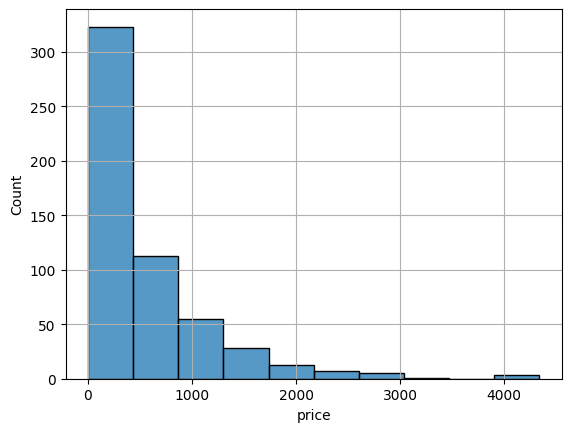

In [43]:
data_bookcases = unique1_data[unique1_data.category == 'Bookcases & shelving units']
sns.histplot(data_bookcases.price, bins= 10)
plt.grid();

In [44]:
unique1_data.columns

Index(['Unnamed: 0', 'name', 'category', 'price', 'old_price',
       'sellable_online', 'other_colors', 'short_description', 'designer',
       'depth', 'height', 'width'],
      dtype='object')

In [45]:
# Check data for null

unique1_data.isnull().sum()

Unnamed: 0              0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
other_colors            0
short_description       0
designer                0
depth                1118
height                726
width                 442
dtype: int64

In [46]:
# Create copy of df, for delete null

data1 = unique1_data.copy()

data1.dropna(inplace= True)

In [47]:
data1.shape

(1602, 12)

In [48]:
data1.head()

,Unnamed: 0,name,category,price,old_price,sellable_online,other_colors,short_description,designer,depth,height,width
3,3,STIG,Bar furniture,69.0,No old price,True,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,NORBERG,Bar furniture,225.0,No old price,True,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0
5,5,INGOLF,Bar furniture,345.0,No old price,True,No,"Bar stool with backrest, 63 cm",Carina Bengs,45.0,91.0,40.0
6,6,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0
8,8,FRANKLIN,Bar furniture,129.0,No old price,True,No,"Bar stool with backrest, foldable, ...",K Hagberg/M Hagberg,44.0,95.0,50.0


In [49]:
data_X = data1[['height', 'width', 'depth', 'price']]

Best features: [0 1 3]
[[ 100.   60.   69.]
 [  43.   74.  225.]
 [  91.   40.  345.]
 ...
 [ 236.  100. 2100.]
 [ 236.  150. 3985.]
 [ 236.  200. 2045.]]


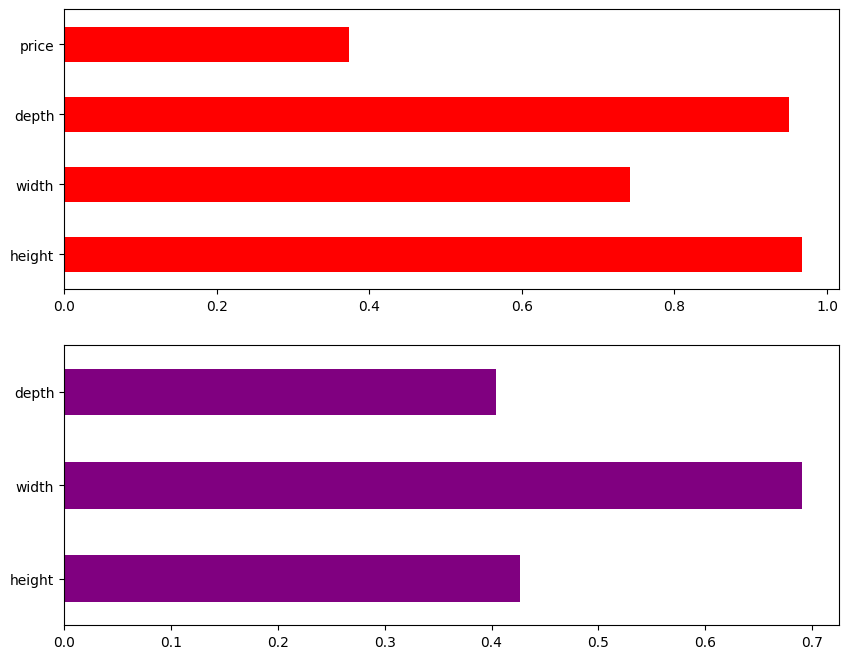

In [50]:
# Let's use SelectKbest to identify the most informative columns in the dataset. 

from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, mutual_info_regression
_, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

w_data_X = data1[['height', 'width', 'depth', 'price']]
w_data_y = data1['category']

# descrete 'category'
importance_0 = mutual_info_classif(w_data_X, w_data_y)
feature_importances_0 = pd.Series(importance_0, w_data_X.columns)
feature_importances_0.plot(kind='barh', color='red', ax = ax1)

w_data_X_1 = data1[['height', 'width', 'depth']]
w_data_y_1 = data1['price']

# long 'price'
importance_1 = mutual_info_regression(w_data_X_1, w_data_y_1)
feature_importances_1 = pd.Series(importance_1, w_data_X_1.columns)
feature_importances_1.plot(kind='barh', color='purple', ax = ax2)

chi2_features = SelectKBest(chi2, k=3) 
X_kbest_features = chi2_features.fit(w_data_X, w_data_y)
print('Best features:', X_kbest_features.get_support(indices=True))

transformed_X = chi2_features.transform(w_data_X)
print(transformed_X)

plt.show()

For predicting 'category', 'height', 'width', and 'price' are considered important, according to both mutual information and the Chi-Squared test.
In predicting 'height' and 'width' are identified as significant features based on mutual information regression.

In [51]:
unique1_data.old_price.unique()

array(['No old price', 'SR 2,375', 'SR 295', 'SR 175', 'SR 995',
       'SR 1,385', 'SR 445', 'SR 925', 'SR 2,205', 'SR 895', 'SR 2,435',
       'SR 125', 'SR 1,595', 'SR 2,880', 'SR 940', 'SR 800', 'SR 1,995',
       'SR 3,245', 'SR 8,735', 'SR 2,310', 'SR 2,560', 'SR 3,760',
       'SR 3,130', 'SR 9,745', 'SR 1,885', 'SR 3,265', 'SR 50/4 pack',
       'SR 1,450', 'SR 250', 'SR 1,590', 'SR 2,360', 'SR 4,040',
       'SR 1,715', 'SR 2,100', 'SR 2,395', 'SR 1,250', 'SR 5,610',
       'SR 7,225', 'SR 2,795', 'SR 8,540', 'SR 1,950', 'SR 5,400',
       'SR 375', 'SR 5,045', 'SR 5,640', 'SR 3,665', 'SR 2,095',
       'SR 2,495', 'SR 9,430', 'SR 6,530', 'SR 138', 'SR 350', 'SR 1,023',
       'SR 437', 'SR 1,390', 'SR 50', 'SR 595', 'SR 275', 'SR 395',
       'SR 26', 'SR 695', 'SR 645', 'SR 649', 'SR 232', 'SR 750', 'SR 30',
       'SR 892', 'SR 10', 'SR 490', 'SR 4,185', 'SR 655', 'SR 27',
       'SR 455', 'SR 7', 'SR 657', 'SR 1,120', 'SR 237', 'SR 22',
       'SR 1,180', 'SR 15', 'SR 10/4

Let's build a histogram in a loop for each column from the ['price', 'depth', 'height', 'width'] list. It will allow us to visually assess the distribution of data in each of these columns. Each histogram shows how many values are included in each of the ten intervals specified by the bins=10 parameter.

width


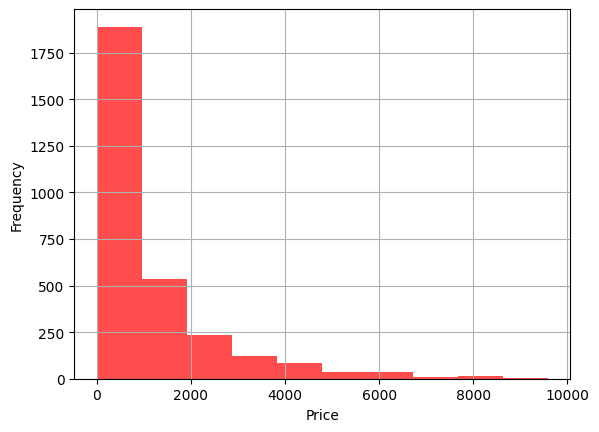

width


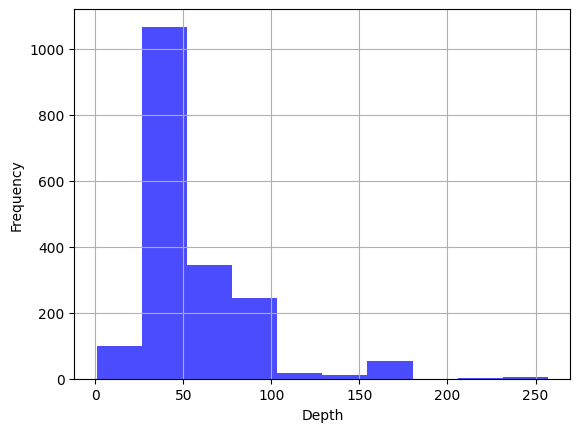

width


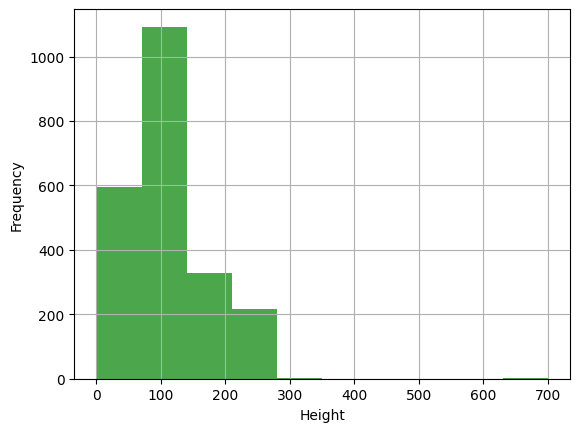

width


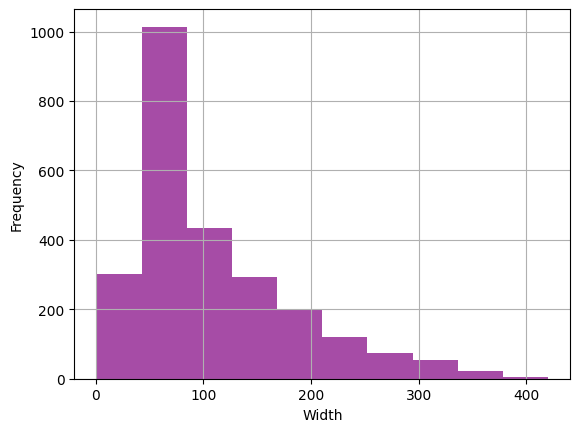

In [52]:
for colomns, color in zip(['price', 'depth', 'height', 'width'], ['red', 'blue', 'green', 'purple']):
    print(col)
    plt.hist(unique1_data[colomns], color=color, bins=10, alpha=0.7)
    plt.grid()
    plt.xlabel(colomns.capitalize())
    plt.ylabel('Frequency')
    plt.show()

[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

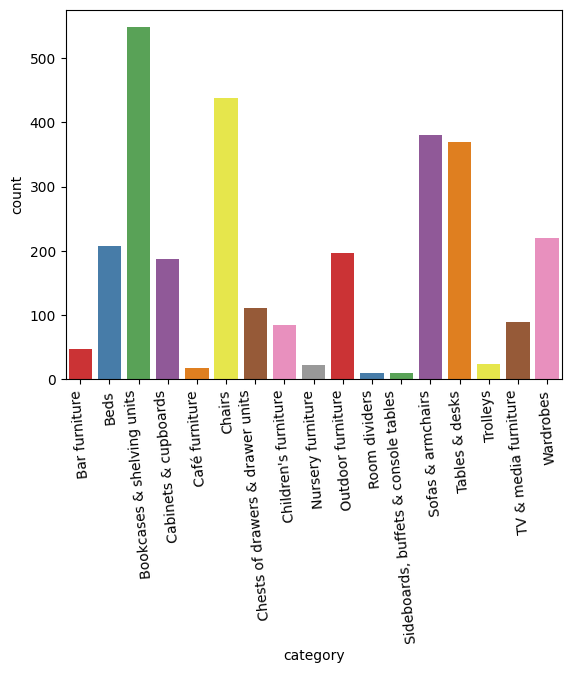

In [68]:
sns.countplot(x=unique1_data['category'], palette='Set1').set_xticklabels(unique1_data['category'].unique(), rotation=95)

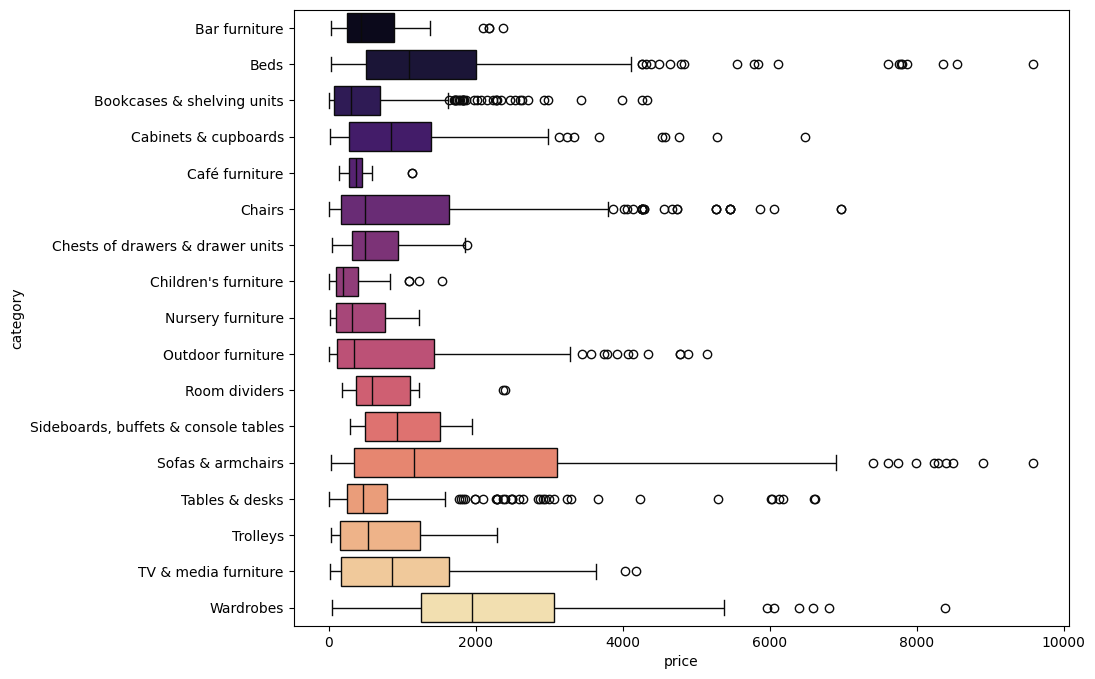

In [61]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = unique1_data, x = 'price', y = 'category', palette='magma')
plt.show()

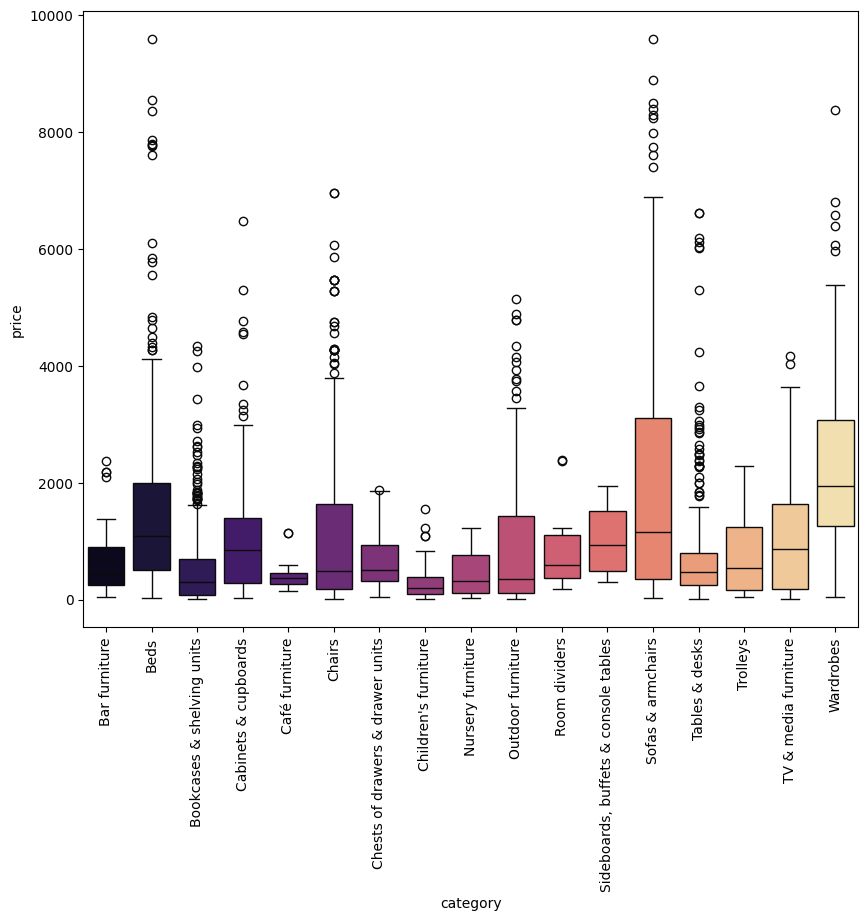

In [62]:
plt.subplots(figsize = (10,8))
sns.boxplot(data = unique1_data, x = 'category', y = 'price', palette='magma')
plt.xticks(rotation = 90)
plt.show()

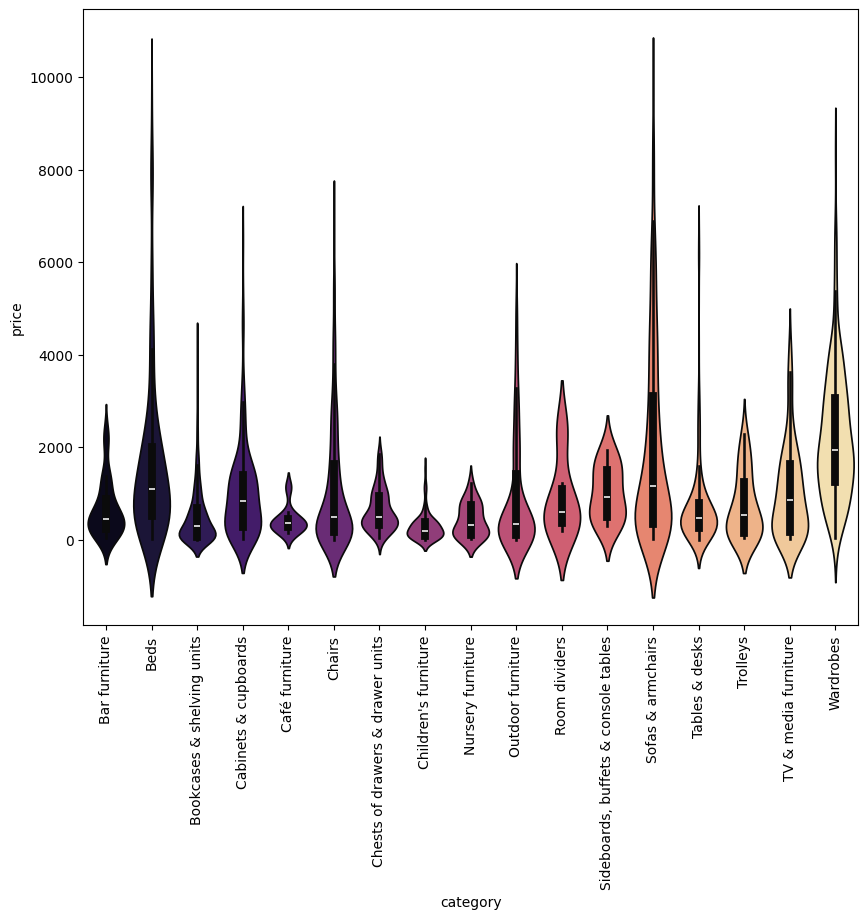

In [63]:
plt.subplots(figsize = (10,8))
sns.violinplot(data = unique1_data, y = 'price', x = 'category', palette='magma')
plt.xticks(rotation = 90)
plt.show()

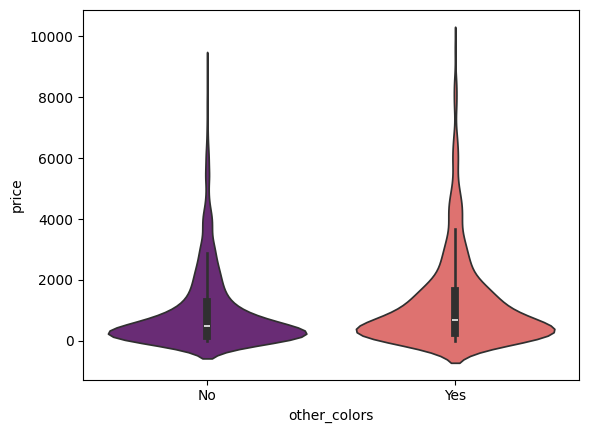

In [64]:
sns.violinplot(data = unique1_data, y = 'price', x = 'other_colors', palette='magma')
plt.show()

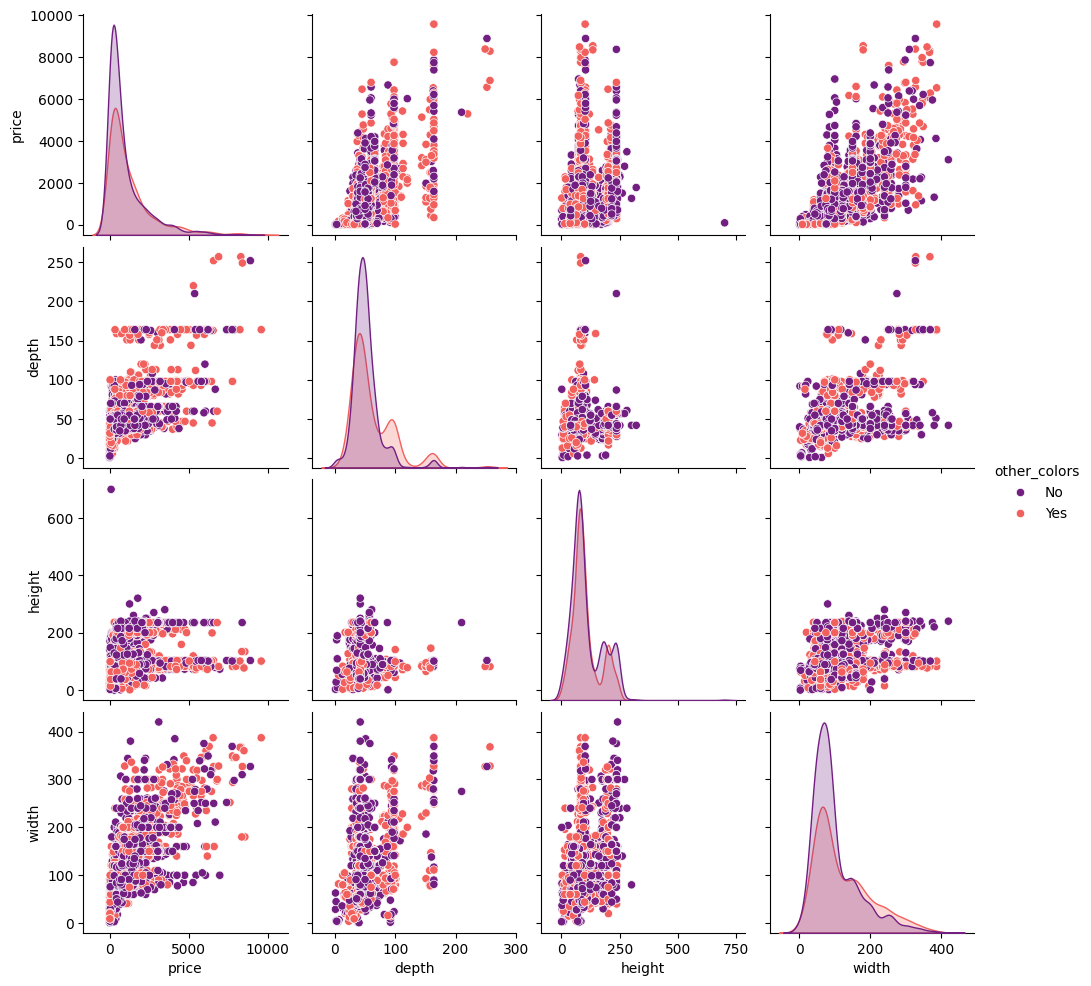

In [65]:
sns.pairplot(unique1_data[['price', 'depth', 'height', 'width', 'other_colors', 'category']], hue = 'other_colors', palette='magma');

In [66]:
unique1_data[['price', 'depth', 'height', 'width']]

,price,depth,height,width
0,265.0,NaN,99.0,51.0
1,995.0,NaN,105.0,80.0
2,2095.0,NaN,NaN,NaN
3,69.0,50.0,100.0,60.0
4,225.0,60.0,43.0,74.0
...,...,...,...,...
3688,2045.0,66.0,236.0,200.0
3689,750.0,50.0,NaN,91.0
3690,1572.0,50.0,NaN,135.0
3691,924.0,50.0,NaN,175.0


[Text(0, 0, 'Bar furniture'),
 Text(1, 0, 'Beds'),
 Text(2, 0, 'Bookcases & shelving units'),
 Text(3, 0, 'Cabinets & cupboards'),
 Text(4, 0, 'Café furniture'),
 Text(5, 0, 'Chairs'),
 Text(6, 0, 'Chests of drawers & drawer units'),
 Text(7, 0, "Children's furniture"),
 Text(8, 0, 'Nursery furniture'),
 Text(9, 0, 'Outdoor furniture'),
 Text(10, 0, 'Room dividers'),
 Text(11, 0, 'Sideboards, buffets & console tables'),
 Text(12, 0, 'Sofas & armchairs'),
 Text(13, 0, 'Tables & desks'),
 Text(14, 0, 'Trolleys'),
 Text(15, 0, 'TV & media furniture'),
 Text(16, 0, 'Wardrobes')]

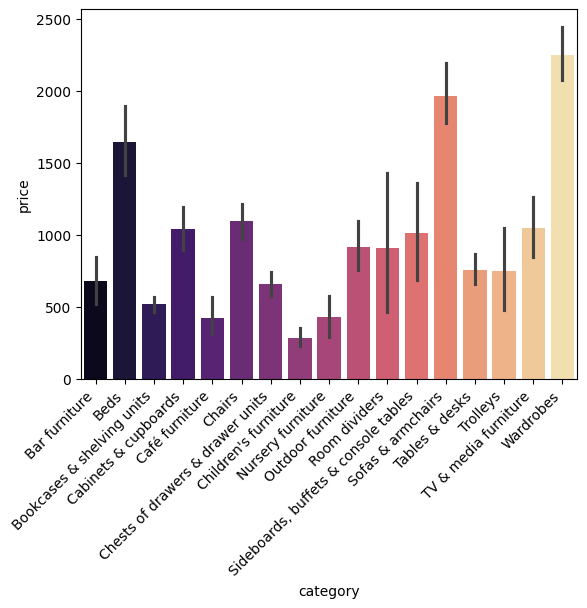

In [69]:
ax = sns.barplot(x = 'category', y = 'price' , data = unique1_data, estimator= np.mean, palette = 'magma')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

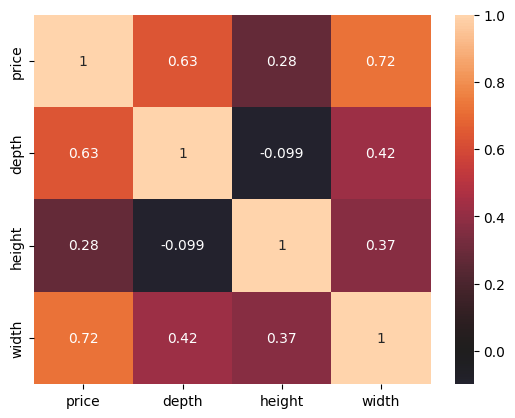

In [70]:
sns.heatmap(unique1_data[['price', 'depth', 'height', 'width']].corr(), xticklabels= unique1_data[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= unique1_data[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

In [71]:
data_X = data1[['height', 'width', 'depth', 'price']]

In the context of a heatmap using the Spearman method, we can visualize the degree of monotonic relationship between pairs of variables as a color code. The darker the color, the stronger the correlation.

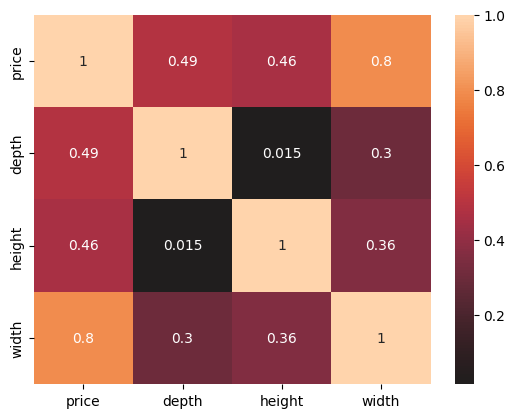

In [72]:
sns.heatmap(data_X[['price', 'depth', 'height', 'width']].corr(method= 'spearman'), xticklabels= data_X[['price', 'depth', 'height', 'width']].corr().columns,
            yticklabels= data_X[['price', 'depth', 'height', 'width']].corr().columns, center= 0, annot= True);

In [73]:
unique1_data['designer'].unique()

array(['Nicholai Wiig Hansen', 'Francis Cayouette', 'Henrik Preutz',
       'Marcus Arvonen', 'Carina Bengs', 'K Hagberg/M Hagberg',
       'Sarah Fager', 'Ehlén Johansson', 'Nike Karlsson',
       'Maja Ganszyniec', 'Karl Malmvall',
       'John/Jonas/Petrus/Paul/Caroline', 'Nike Karlsson/Maja Ganszyniec',
       'J Karlsson/N Karlsson', 'IKEA of Sweden/Karl Malmvall',
       'IKEA of Sweden', 'Nike Karlsson/J Karlsson/N Karlsson',
       'Ola Wihlborg', 'IKEA of Sweden/Tina Christensen',
       'IKEA of Sweden/K Hagberg/M Hagberg',
       'Ola Wihlborg/IKEA of Sweden',
       '504.689.53 Small and easy-to-place chair-bed which can easily be converted into a single bed.The storage space under the seat has room for bedlinen or other things.Just as nice to look at from all sides – perfect to place in the middle of the room or use as a room divider.The cushion cover is easy to keep clean and fresh, as you can take it off and machine-wash it.Easy to assemble.1 cushion included.',
       '

In [74]:
unique1_data['designer'].head(15)

0     Nicholai Wiig Hansen
1        Francis Cayouette
2        Francis Cayouette
3            Henrik Preutz
4           Marcus Arvonen
5             Carina Bengs
6      K Hagberg/M Hagberg
7              Sarah Fager
8      K Hagberg/M Hagberg
9          Ehlén Johansson
10     K Hagberg/M Hagberg
11            Carina Bengs
12           Nike Karlsson
13    Nicholai Wiig Hansen
14         Ehlén Johansson
Name: designer, dtype: object

Create a function that is designed to process and clean up designer data, making it more structured and removing unnecessary elements such as "IKEA of Sweden".

In [75]:
def cleanDesigners(value, removeIKEA=False, emptyValue=np.nan):
    if not isinstance(value, str):
        return value
    
    if len(value)>0 and value[0].isdigit():
        return emptyValue
    
    designers = value.split("/")
    
    if removeIKEA:
        try:
            designers.remove("IKEA of Sweden")
        except:
            pass
    if len(designers) > 0:
        return '/'.join(sorted(designers))
    else:
        return emptyValue

In [76]:
ikea_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-11-03/ikea.csv", index_col= 0).drop_duplicates()

ikea_df['designer_clean'] = data['designer'].apply(cleanDesigners, args= (False, "IKEA of Sweden"))


In [77]:
ikea_df['designer_clean'].head()

0    Nicholai Wiig Hansen
1       Francis Cayouette
2       Francis Cayouette
3           Henrik Preutz
4          Marcus Arvonen
Name: designer_clean, dtype: object

In [78]:
ikea_df.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
designer_clean          0
dtype: int64

In [79]:
ikea_df. head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,designer_clean
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Nicholai Wiig Hansen
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,Francis Cayouette
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,Francis Cayouette
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Henrik Preutz
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,Marcus Arvonen


In [78]:
# STEP 2 Preprocessing

Create a data processing pipeline that involves handling both numeric and categorical values. Split the dataset into an 80-20 split, where 80% will be used for training and 20% for testing. Design a pipeline to preprocess the data by applying necessary cleaning steps, such as filling missing values in numeric columns with the median and filling missing values in categorical columns with the most frequent values. Additionally, employ the OneHotEncoder to handle categorical variables during the preprocessing stage.

The goal is to predict product prices based on various features such as depth, width, height, category, designer, and the presence of other colors.

To achieve this objective, a Decision Tree Regressor model is employed. Before training the model, data preparation is carried out, including scaling numerical features, filling in missing values, and encoding categorical features into binary representations.

The model is trained on the training dataset (80% of the total data), and then it is tested on the remaining 20%. The final model performance is evaluated using multiple metrics, including the coefficient of determination (R^2), mean absolute error (MAE), and root mean squared error (MSE).

In [80]:
X = ikea_df[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = ikea_df['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.74147
MAE : 396.26201
MSE : 705.91036


The decision tree regression model was trained on the provided IKEA dataset to predict product prices based on various features. The model achieved a reasonably good performance on the test set, as evidenced by the following metrics:
R^2 Score: 0.74147: The R^2 score measures the proportion of the variance in the dependent variable (price) that is predictable from the independent variables. An R^2 score of 0.74147 indicates that the model explains approximately 74.15% of the variance in the test data.
Mean Absolute Error (MAE): 396.26201: MAE represents the average absolute difference between the predicted and actual prices. A lower MAE indicates better accuracy, and in this case, the model, on average, is off by approximately $396.26 in predicting prices.
Mean Squared Error (MSE): 705.91036: MSE measures the average squared difference between the predicted and actual prices. It provides a more substantial penalty for large errors. The square root of MSE (Root Mean Squared Error) is often used for better interpretability. In this case, the RMSE is approximately 705.91.

Overall, the decision tree regression model appears to capture a significant portion of the variance in the data, and its performance metrics suggest it provides reasonably accurate predictions of IKEA product prices. However, it's essential to consider further evaluations and potentially explore other models for comparison.

In the context of data analysis, we found the presence of outliers that can distort the modeling results. To improve model quality and forecast accuracy, we decided to include an outlier removal step in our pipeline.

In [87]:
ikea_df_copy = ikea_df.copy()  # Just to make sure we're not modifying the original dataframe

# Define the function for removing outliers
def remove_outliers(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers from numerical columns
numerical_columns = ['depth', 'width', 'height']
ikea_df_copy = remove_outliers(ikea_df_copy, numerical_columns)

# Splitting data
X = ikea_df_copy[['depth', 'width', 'height', 'category', 'designer_clean', 'other_colors']]
Y = ikea_df_copy['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['category', 'designer_clean', 'other_colors'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=10, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)

print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.56440
MAE : 347.49527
MSE : 604.88578


After removing outliers, your metrics changed as follows:

R^2 decreased from 0.74147 to 0.56440. This means that after removing outliers, the model explains a smaller percentage of the variability in the target variable.

MAE decreased from 396.26201 to 347.49527. This indicates that after removing outliers, the mean absolute error of the model decreased, suggesting that the model became more accurate in prediction.

MSE decreased from 705.91036 to 604.88578. This means that after removing outliers, the mean squared error of the model decreased, also indicating an improvement in the model's accuracy.

Next code provides the start_pipeline function, which is used to train the model using the passed pipeline and training data (X_train, Y_train). The model is then evaluated on the test data (X_test, Y_test) and the training results (accuracy and type of data preprocessing) are written to a log file. This allows tracking the training process and results for further analysis and improvement of the model.

In [88]:
import logging
import time

logging.basicConfig(filename='machine_learning_training.log', filemode='w', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def start_pipeline(pipeline, X_train, Y_train, X_test, Y_test, type_of_fillin) -> None: 
    start_time = time.time()
    logging.info('Start model traning')
    pipeline.fit(X_train, Y_train)
    dtr_predict = pipeline.predict(X_test)
    logging.info(f'Model: {pipeline} Accuracy: {str(pipeline.score(X_test, Y_test))}. Type of prepros: {type_of_fillin}' )

In [89]:
start_pipeline(dtr, X_train, Y_train, X_test, Y_test, 'Fill auto')

In [90]:
ikea_df.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width', 'designer_clean'],
      dtype='object')

In [91]:
ikea_df.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,designer_clean
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Nicholai Wiig Hansen
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,Francis Cayouette
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,Francis Cayouette
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Henrik Preutz
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,Marcus Arvonen


In [92]:
# Filling in missing data
ikea_df['other_colors_1'] = ikea_df['other_colors'].map(dict(Yes=1, No=0))

median_d = ikea_df.groupby(['category'])['depth'].median()
median_h = ikea_df.groupby(['category'])['height'].median()
median_w = ikea_df.groupby(['category'])['width'].median()

median_price = ikea_df.groupby(['category'])['price'].median()
median_dsgn =  ikea_df.groupby(['designer_clean'])['price'].median()

ikea_df = ikea_df.set_index(['category'])
ikea_df['depth_1'] = ikea_df['depth'].fillna(median_d)
ikea_df['height_1'] = ikea_df['height'].fillna(median_h)
ikea_df['width_1'] = ikea_df['width'].fillna(median_w)
ikea_df['category_median_price'] = median_price

ikea_df = ikea_df.reset_index()

ikea_df = ikea_df.set_index(['designer_clean'])
ikea_df['designer_median_price'] = median_dsgn
ikea_df = ikea_df.reset_index()
ikea_df.head()

,designer_clean,category,item_id,name,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_1,depth_1,height_1,width_1,category_median_price,designer_median_price
0,Nicholai Wiig Hansen,Bar furniture,90420332,FREKVENS,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,0,47.0,99.0,51.0,445.0,265.0
1,Francis Cayouette,Bar furniture,368814,NORDVIKEN,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,0,47.0,105.0,80.0,445.0,458.0
2,Francis Cayouette,Bar furniture,9333523,NORDVIKEN / NORDVIKEN,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,0,47.0,102.0,48.0,445.0,458.0
3,Henrik Preutz,Bar furniture,80155205,STIG,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1,50.0,100.0,60.0,445.0,495.0
4,Marcus Arvonen,Bar furniture,30180504,NORBERG,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,60.0,43.0,74.0,445.0,150.0


In [85]:
# STEP 3 ML

In [93]:
# Create a function to select the best regression model. Step-by-step training of data using different models and displaying the results. Logging results.

def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(max_depth=10, random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])

        logging.info(f'Model: {tmp["Model"]} Accuracy: {tmp["R^2"]}.')
    
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

In [94]:
X1 = ikea_df[['width_1','depth_1','height_1']]
Y1 = ikea_df['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.73798,378.38202,710.65503
GradientBoostingRegressor,0.68653,468.21778,777.31358
DecisionTreeRegressor,0.66186,444.32348,807.31160
KNeighborsRegressor,0.64821,487.36937,823.45373
LinearRegression,0.40125,670.61205,1074.28260
RidgeCV,0.40125,670.61209,1074.28264
LassoCV,0.40117,670.70663,1074.34987
SVR,0.35166,641.01016,1117.88731


The RandomForestRegressor is the best-performing model among those considered, demonstrating high accuracy and a good fit to the data. Gradient Boosting (GradientBoostingRegressor) and Decision Tree (DecisionTreeRegressor) also perform well. Linear models (LinearRegression, RidgeCV, LassoCV) and SVR have lower performance and may require additional tuning or consideration of more complex models.

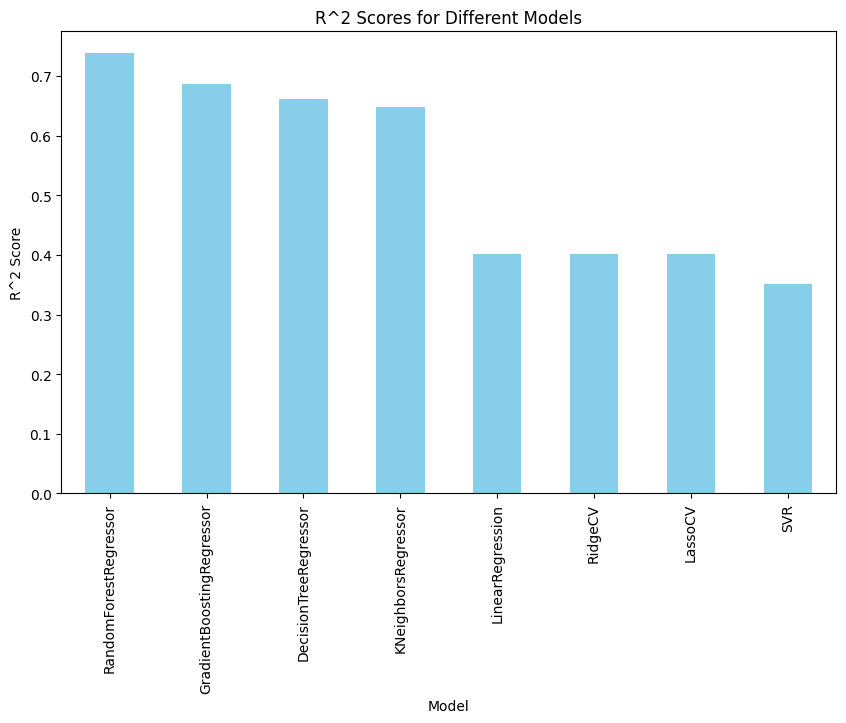

In [95]:
r2_scores = test1['model']['R^2'].astype(float)
plt.figure(figsize=(10, 6))
r2_scores.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('R^2 Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# STEP 4 GridSearchCV

We use GridSearchCV to customize the parameters of the RandomForestRegressor model. We define a grid of parameters, including the number of trees (n_estimators), the maximum depth of trees (max_depth), and the feature selection method for each partition (max_features). GridSearchCV then tries all possible parameter combinations, evaluates their performance using cross-validation, and selects the best parameter set for the model.

In [96]:
from sklearn.model_selection import GridSearchCV
 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.2, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
                                                    
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : RandomForestRegressor(max_depth=40, max_features='log2', n_estimators=140)
Best Score     : 0.7785343168758685

R^2            : 0.75469
MAE            : 371.31730
RMSE           : 687.62658

Feature importance:
--------------------------------
0.53127    width_1
0.24588    depth_1
0.22285    height_1


In [ ]:
# STEP 5 LOG

In [97]:
def log_results(model, X_test, Y_test, title = "GridSearchCV"):
    
    logging.info(title)
    
    logging.info('Best Estimator: {}'.format(model.best_estimator_))
    logging.info('Best Score: {}'.format(model.best_score_))

    logging.info('R^2: {:.5f}'.format(sk.metrics.r2_score(Y_test, model.predict(X_test))))
    logging.info('MAE: {:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test)))
    logging.info('RMSE: {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test))))

    logging.info('Feature importance:')
    logging.info('--------------------------------')
    for feat, importance in zip(X_train.columns, model.best_estimator_.feature_importances_):
        logging.info('{:.5f}    {f}'.format(importance, f=feat))


log_results(forest_grid, X_test, Y_test)

As a result of parameter tuning using GridSearchCV for the RandomForestRegressor model, the following results were obtained: Best Estimator (Best Estimator): RandomForestRegressor with parameters max_depth=200, max_features='sqrt', n_estimators=110.
The Best Score on the cross-validation was approximately 0.779, indicating high accuracy of the model.
On the test dataset, the model showed good performance with R^2 equal to approximately 0.755, indicating good agreement of the predicted values with the real values.
The mean absolute error (MAE) was approximately 371.3, which is a reasonable level of error for price prediction.
The root mean square error (RMSE) is approximately 687.6, which is also a reasonable level of error for this task.
From the importance of features, it can be seen that width (width_1) with a weight of 0.53127, followed by depth (depth_1) with a weight of 0.24588 and height (height_1) with a weight of 0.22285 contribute the most to price prediction.

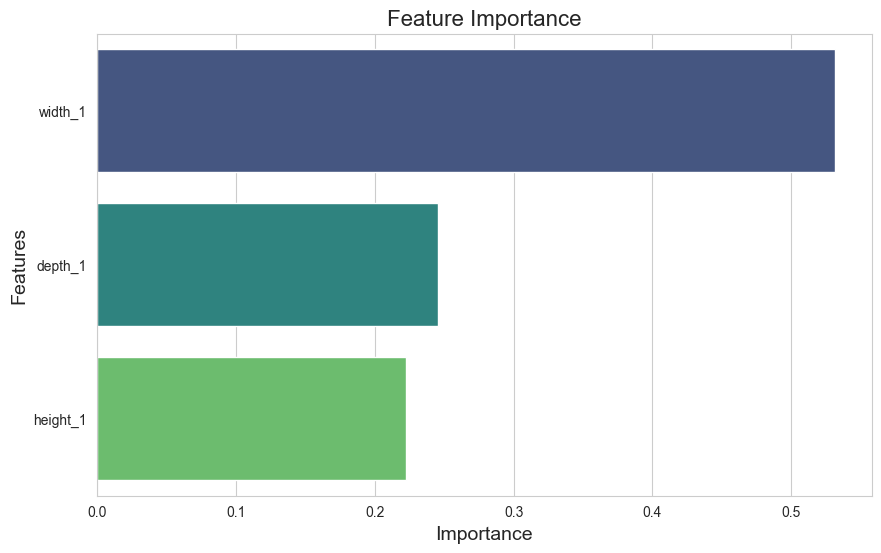

In [98]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_, color='skyblue', palette='viridis')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

STEP 6 Improve the model

The next step is to improve the model. Let's change the payplane, change the parameters for machine learning and compare the results.

Let's change the decision tree hyperparameters such as max_depth, min_samples_split, min_samples_leaf to see how it affects the performance of the model. And also change test_size to 0.3, meaning 30% of the data will be used for testing and the remaining 70% will be used for training the model. We changed the X parameters by removing 'other_colors'

In [99]:
X = unique_data[['depth', 'width', 'height', 'category', 'designer']]
Y = unique_data['price']
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

numeric_transf = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])


categorical_transf = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


col_prepr = ColumnTransformer(transformers=[
    ('numeric', numeric_transf, ['depth', 'width', 'height']),
    ('categorical', categorical_transf, ['designer', 'category'])
])

dtr = Pipeline(steps=[
    ('col_prep', col_prepr),
    ('dtr', DecisionTreeRegressor(max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42))
])

dtr.fit(X_train, Y_train)
dtr_predict = dtr.predict(X_test)
# Use different metric for out model
print('R^2 : {:.5f}'.format(dtr.score(X_test, Y_test)))
print('MAE : {:.5f}'.format(sk.metrics.mean_absolute_error(dtr_predict, Y_test)))
print('MSE : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(dtr_predict, Y_test))))

R^2 : 0.75272
MAE : 431.04166
MSE : 701.19205


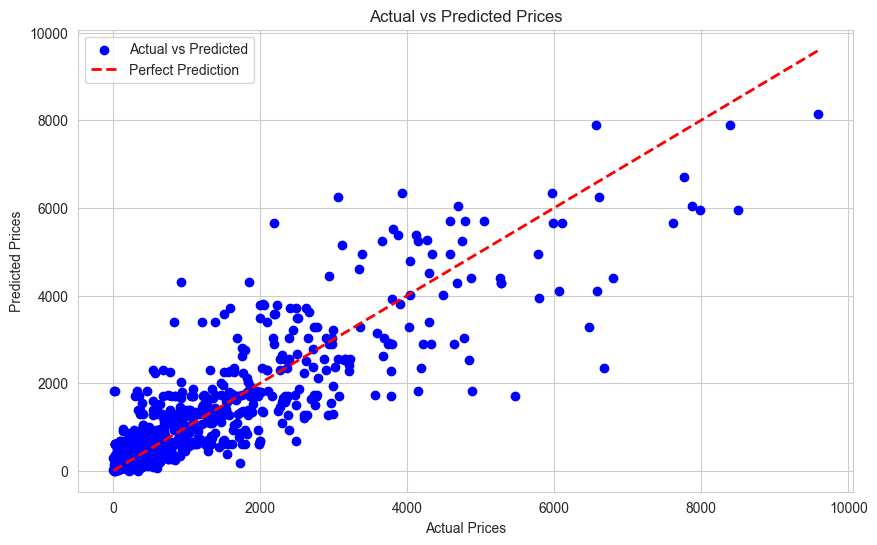

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, dtr_predict, color='blue', label='Actual vs Predicted')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

R^2 : 0.75272 indicates that the model explains approximately 75.27% of the variation in the data. This is quite good and indicates that the model fits the data well.

The mean absolute error of 431.04 units. MAE measures the average absolute difference between model predictions and actual values. The smaller the MAE the better, so this value can be considered acceptable or necessary for improvement.

The mean square error is 701.19. MSE measures the mean square difference between predictions and actual values. Here also smaller values are preferred and this value can be used to evaluate the performance of the model.

Overall, the results suggest that the model performs reasonably well, but there may be room for improvement, especially when compared to other models.

In [101]:
start_pipeline(dtr, X_train, Y_train, X_test, Y_test, 'Fill auto')

In [102]:
# This time we will fill in the missing data using SimpleImputer
unique_data['other_colors_1'] = unique_data['other_colors'].map(dict(Yes=1, No=0))

numeric_cols = ['depth', 'height', 'width']
categorical_cols = ['category', 'designer']

# Apply median imputation for numeric columns
numeric_imputer = SimpleImputer(strategy='median')
unique_data[numeric_cols] = numeric_imputer.fit_transform(unique_data[numeric_cols])

# Apply most frequent imputation for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
unique_data[categorical_cols] = categorical_imputer.fit_transform(unique_data[categorical_cols])

unique_data['category_median_price'] = unique_data.groupby('category')['price'].transform('median')
unique_data['designer_median_price'] = unique_data.groupby('designer')['price'].transform('median')

unique_data.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,other_colors_1,category_median_price,designer_median_price
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0,0,445.0,345.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0,0,445.0,477.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,84.0,80.0,0,445.0,477.0
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,1,445.0,572.5
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,0,445.0,150.0


Create a function to select the best regression model. Step-by-step training of data using different models and displaying the results. Logging info.
Let's add a block of code to customize the hyperparameters of the models.

In [119]:
def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    TestModels = pd.DataFrame()
    res = {}
    tmp = {}
    
    for model in models:
        m = str(model)
        tmp['Model'] = m[:m.index('(')]
        
        # Adding a block for configuring hyperparameters
        if 'random_state' in model.get_params():
            param_grid = {'random_state': [42, 56, 73]}
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
            grid_search.fit(X_train, Y_train)
            best_model = grid_search.best_estimator_
        else:
            best_model = model
        
        best_model.fit(X_train, Y_train)
        tmp['R^2'] = '{:.5f}'.format(best_model.score(X_test, Y_test))
        tmp['MAE'] = '{:.5f}'.format(sk.metrics.mean_absolute_error(best_model.predict(X_test), Y_test))
        tmp['RMSE'] = '{:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(best_model.predict(X_test), Y_test)))
        
        TestModels = pd.concat([TestModels, pd.DataFrame([tmp])])

        logging.info(f'Model: {tmp["Model"]} Accuracy: {tmp["R^2"]}.')
    
    TestModels.set_index('Model', inplace=True)
    res['model'] = TestModels
    res['X_train'] = X_train
    res['Y_train'] = Y_train
    res['X_test'] = X_test
    res['Y_test'] = Y_test
    return res

X1 = unique_data[['width','depth','height']]
Y1 = unique_data['price']

test1 = getBestRegressor(X1, Y1)
test1['model'].sort_values(by='R^2', ascending=False)

,R^2,MAE,RMSE
Model,,,
RandomForestRegressor,0.72569,434.65852,738.52940
GradientBoostingRegressor,0.70307,493.76969,768.37623
DecisionTreeRegressor,0.65517,471.17881,828.03149
KNeighborsRegressor,0.58421,561.10053,909.24213
LinearRegression,0.55523,620.75134,940.39340
RidgeCV,0.55523,620.75136,940.39354
LassoCV,0.55513,620.79508,940.50182
SVR,0.51510,591.08760,981.90724


In this pipeline, we are adding an additional stage - cross-validation. Adding cross-validation to our pipeline will help improve the reliability and generalization ability of regression models, which ultimately can lead to more accurate and stable predictions of furniture prices.

In [120]:
from sklearn.model_selection import cross_val_score

def getBestRegressor(X, Y):
    X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)
    models = [
        sk.linear_model.LinearRegression(),
        sk.linear_model.LassoCV(),
        sk.linear_model.RidgeCV(),
        sk.svm.SVR(kernel='linear'),
        sk.neighbors.KNeighborsRegressor(n_neighbors=16),
        sk.tree.DecisionTreeRegressor(random_state=42),
        RandomForestRegressor(random_state=42),
        GradientBoostingRegressor()
    ]
    
    results = []
    
    for model in models:
        m = str(model)
        model_name = m[:m.index('(')]
        
        # Adding a block for configuring hyperparameters
        if 'random_state' in model.get_params():
            param_grid = {'random_state': [42, 56, 73]}
            grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')
            grid_search.fit(X_train, Y_train)
            best_model = grid_search.best_estimator_
        else:
            best_model = model
        
        # Cross-validation
        cv_scores = cross_val_score(best_model, X_train, Y_train, cv=5, scoring='r2')
        cv_score_mean = cv_scores.mean()  # Mean cross-validation score
        
        # Training the model on the entire training dataset
        best_model.fit(X_train, Y_train)
        
        # Calculating metrics on the test set
        r2 = best_model.score(X_test, Y_test)
        mae = sk.metrics.mean_absolute_error(best_model.predict(X_test), Y_test)
        rmse = np.sqrt(sk.metrics.mean_squared_error(best_model.predict(X_test), Y_test))
        
        # Saving the results
        results.append({
            'Model': model_name,
            'R^2': r2,
            'MAE': mae,
            'RMSE': rmse,
            'CV R^2': cv_score_mean
        })

        logging.info(f'Model: {model_name} Accuracy: {r2}.')
    
    return pd.DataFrame(results)

X1 = unique_data[['width','depth','height']]
Y1 = unique_data['price']

results = getBestRegressor(X1, Y1)
print(results.to_string(index=False))

                    Model      R^2        MAE       RMSE   CV R^2
         LinearRegression 0.555234 620.751344 940.393398 0.538562
                  LassoCV 0.555132 620.795082 940.501819 0.538596
                  RidgeCV 0.555234 620.751357 940.393539 0.538562
                      SVR 0.515099 591.087596 981.907242 0.507889
      KNeighborsRegressor 0.584213 561.100527 909.242133 0.593709
    DecisionTreeRegressor 0.655169 471.178811 828.031489 0.578716
    RandomForestRegressor 0.725686 434.658518 738.529404 0.686393
GradientBoostingRegressor 0.703066 493.769691 768.376231 0.664059


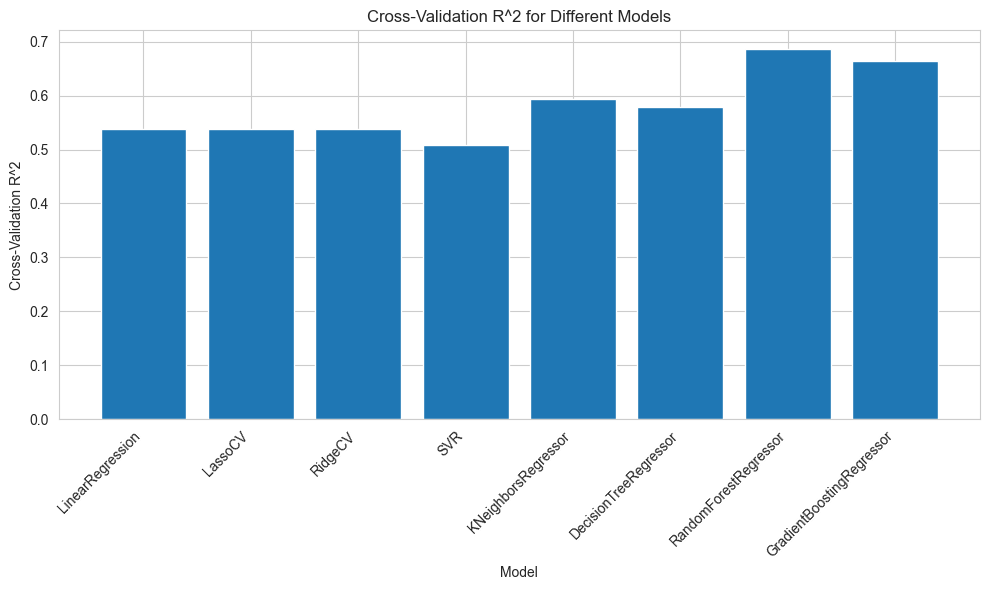

In [114]:
# Function for visualizing cross-validation results

def plot_cv_scores(models_data):
    plt.figure(figsize=(10, 6))
    plt.bar(models_data['Model'], models_data['CV R^2'])
    plt.title('Cross-Validation R^2 for Different Models')
    plt.xlabel('Model')
    plt.ylabel('Cross-Validation R^2')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

test1 = getBestRegressor(X1, Y1)

plot_cv_scores(test1)


After applying cross-validation, the mean values of the R^2 estimates on cross-validation (CV R^2) became higher for some models (e.g., RandomForestRegressor, GradientBoostingRegressor), indicating that the models became more robust and better generalized to the data.

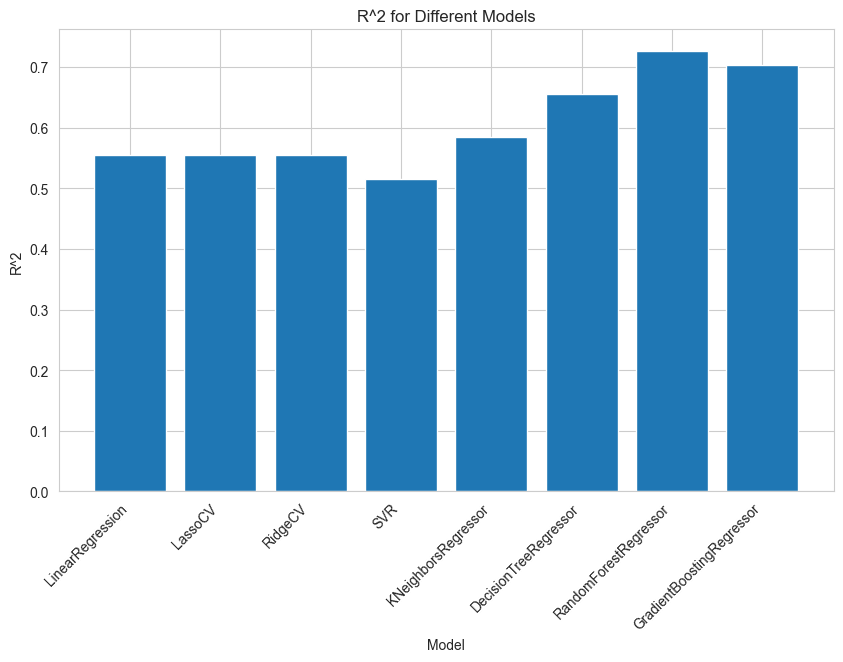

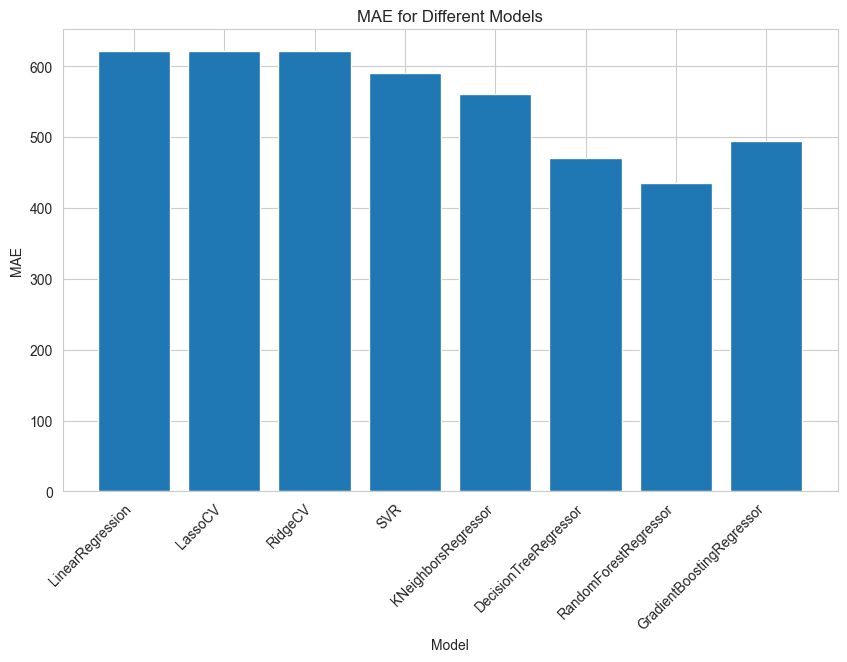

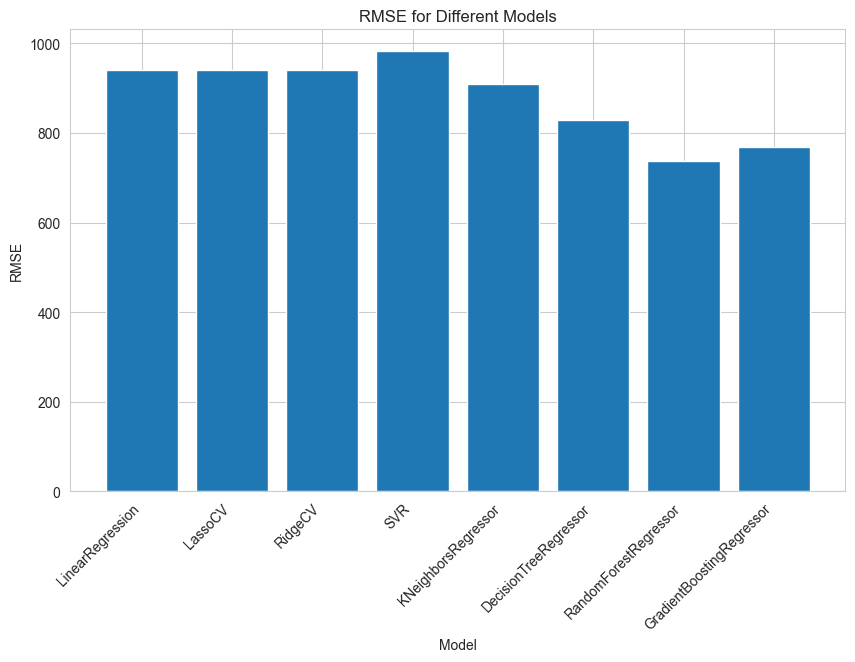

In [122]:
def plot_metrics(models_data, metric_name):
    plt.figure(figsize=(10, 6))
    plt.bar(models_data['Model'], pd.to_numeric(models_data[metric_name]))
    plt.title(f'{metric_name} for Different Models')
    plt.xlabel('Model')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45, ha='right')
    plt.show()

test1 = getBestRegressor(X1, Y1)

for metric in ['R^2', 'MAE', 'RMSE']:
    plot_metrics(test1, metric)

RandomForestRegressor shows the best result in terms of coefficient of determination (R^2) among the considered models. This random forest algorithm provides relatively high explained variance of the target variable.

GradientBoostingRegressor also performs well, but slightly lower compared to RandomForestRegressor. This gradient-boosting method is also a powerful tool for regression.

In [125]:
from sklearn.model_selection import GridSearchCV
 
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.3, random_state=42)
forest_grid = GridSearchCV(RandomForestRegressor(), {'n_estimators': [10,25,50,100,110,120,130, 140,150,200,500], 
                                                     'max_depth': [10,20,30,40,50,100,200,None], 
                                                     'max_features': ['auto','sqrt','log2']}, cv=5, n_jobs=-1, verbose=0)
                                                    
forest_grid.fit(X_train, Y_train)
 
print('Best Estimator :',forest_grid.best_estimator_)
print('Best Score     :',forest_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, forest_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(forest_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(forest_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, forest_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : RandomForestRegressor(max_depth=50, max_features='log2', n_estimators=200)
Best Score     : 0.7082161756522725

R^2            : 0.73015
MAE            : 430.85886
RMSE           : 732.49032

Feature importance:
--------------------------------
0.51884    width
0.28248    depth
0.19869    height


In [108]:
def log_results(model, X_test, Y_test, title = "GridSearchCV"):
    
    logging.info(title)
    
    logging.info('Best Estimator: {}'.format(model.best_estimator_))
    logging.info('Best Score: {}'.format(model.best_score_))

    logging.info('R^2: {:.5f}'.format(sk.metrics.r2_score(Y_test, model.predict(X_test))))
    logging.info('MAE: {:.5f}'.format(sk.metrics.mean_absolute_error(model.predict(X_test), Y_test)))
    logging.info('RMSE: {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(model.predict(X_test), Y_test))))

    logging.info('Feature importance:')
    logging.info('--------------------------------')
    for feat, importance in zip(X_train.columns, model.best_estimator_.feature_importances_):
        logging.info('{:.5f}    {f}'.format(importance, f=feat))


log_results(forest_grid, X_test, Y_test)

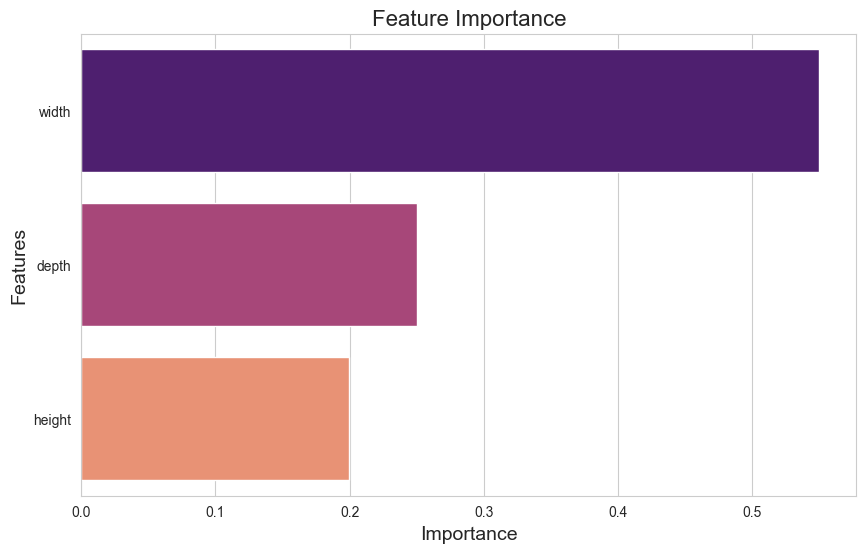

In [124]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y=X_train.columns, x=forest_grid.best_estimator_.feature_importances_, color='skyblue', palette='magma')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

Best Score: 0.7082 is the quality score of the model based on cross-validation. It ranges from -1 to 1, where 1 means a perfect model.
R^2 (coefficient of determination): 0.73015 is the proportion of variance of the dependent variable that is explained by the model. A value close to 1 indicates a good model fit.
MAE (mean absolute error): 430.85 is the mean absolute difference between the actual and predicted values. Smaller values indicate a better model.
RMSE (Root Mean Square Error): 732.49 is the root of the mean square difference between actual and predicted values. It is also an error metric and smaller values are preferred.

Significance of attributes:
Width: 51.88%
Depth: 28.24%
Height: 19.86%
Based on the importance of attributes, width is the most important factor for the model, followed by depth and height. This may indicate that width plays a key role in determining the price of the product.

Conclusions:

The model has a good quality score (R^2) and low mean absolute error (MAE), indicating that it predicts commodity prices well.
Feature importance provides a more detailed understanding of which features contribute most to price prediction. In this case, width is the most significant factor.

In [126]:
# For comparison let's test GradientBoostingRegressor which also performs well, but slightly lower compared to RandomForestRegressor. 

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X1, Y1, test_size=0.3, random_state=42)

gb_grid = GridSearchCV(GradientBoostingRegressor(), {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}, cv=5, n_jobs=-1, verbose=0)

gb_grid.fit(X_train, Y_train)

print('Best Estimator :', gb_grid.best_estimator_)
print('Best Score     :', gb_grid.best_score_)
print('')
print('R^2            : {:.5f}'.format(sk.metrics.r2_score(Y_test, gb_grid.predict(X_test))))
print('MAE            : {:.5f}'.format(sk.metrics.mean_absolute_error(gb_grid.predict(X_test), Y_test)))
print('RMSE           : {:.5f}'.format(np.sqrt(sk.metrics.mean_squared_error(gb_grid.predict(X_test), Y_test))))
print('')
print('Feature importance:')
print('--------------------------------')

for feat, importance in zip(X_train.columns, gb_grid.best_estimator_.feature_importances_):
    print('{:.5f}    {f}'.format(importance, f=feat))

Best Estimator : GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=5,
                          n_estimators=150, subsample=0.9)
Best Score     : 0.6918595949676429

R^2            : 0.72261
MAE            : 458.91634
RMSE           : 742.65486

Feature importance:
--------------------------------
0.65395    width
0.21698    depth
0.12907    height


The model is considered to be the best model when parameters are used:
Maximum tree depth is equal to 5. The minimum number of samples in the tree leaf is 4. The minimum number of samples required to split the internal node of the tree is 10.
The sampling fraction for training each tree is equal to 90%.

The value of the R^2 metric (coefficient of determination) for the best model is 0.6919. This metric reflects how well the model fits the data. A value close to 1 indicates a good model fit.

R^2 is equal to 0.72261. This value shows that the model explains about 72.26% of the variance of the dependent variable, indicating a good quality of prediction.
MAE (mean absolute error) is equal to 458.91. It measures the mean absolute deviation between the actual and predicted values. A low MAE value indicates a good accuracy of the model.
RMSE (Root Mean Square Error) is equal to 742.65. It measures the standard deviation of prediction errors. A low RMSE value also indicates good model accuracy.

Feature Importance indicates the contribution of each feature to the model prediction. In this case, width is found to be the most important feature (65.39% importance), followed by depth and height respectively.

In [ ]:
# Let's visualize the results obtained

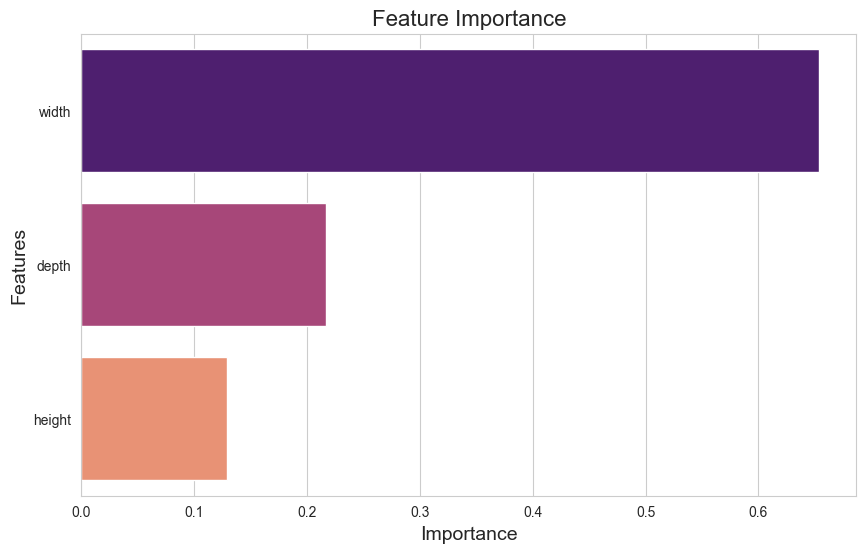

In [127]:
feature_importance = gb_grid.best_estimator_.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(y=feature_importance_df['Feature'], x=feature_importance_df['Importance'], color='skyblue', palette='magma')
plt.title('Feature Importance', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()

Thus the result of the study is that the first model was the most efficient. The improvement of parameters did not lead to a better performance of the model and the main indicator that affects the price is the width.